# 2.3.1 载入各种数据科学以及可视化库


In [2]:
#coding:utf-8
#导入warnings包，利用过滤器来实现忽略警告语句。
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
## 1) 载入训练集和测试集；
path = 'C:/Users/31200/Desktop/学习/Kaggle/第一次比赛二手车价格预测/'
Train_data = pd.read_csv(path+'used_car_train_20200313.csv', sep=' ')
Test_data = pd.read_csv(path+'used_car_testA_20200313.csv', sep=' ')

In [6]:
## 2) 简略观察数据(head()+shape)
Train_data.head().append(Train_data.tail())   

#.head()表示头部，.tail()表示尾部

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,...,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,...,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,...,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,...,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,...,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [7]:
Train_data.shape

(150000, 31)

# 2.3.3 总览数据概况

In [8]:
## 1) 通过describe()来熟悉数据的相关统计量
Train_data.describe()

#个数count、平均值mean、方差std、最小值min、中位数25% 50% 75% 、以及最大值

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [9]:
## 2) 通过info()来熟悉数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

# 2.3.4 判断数据缺失和异常


In [12]:
## 1) 查看每列的存在nan情况
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

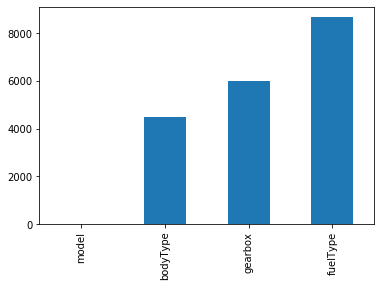

In [13]:
# nan可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)  #sort_values 排序 inplace是用排序
                                    #后的数据替换原数据
missing.plot.bar()

通过以上两句可以很直观的了解哪些列存在 “nan”, 并可以把nan的个数打印，主要的目的在于 nan存在的个数是否真的很大，如果很小一般选择填充，如果使用lgb等树模型可以直接空缺，让树自己去优化，但如果nan存在的过多、可以考虑删掉

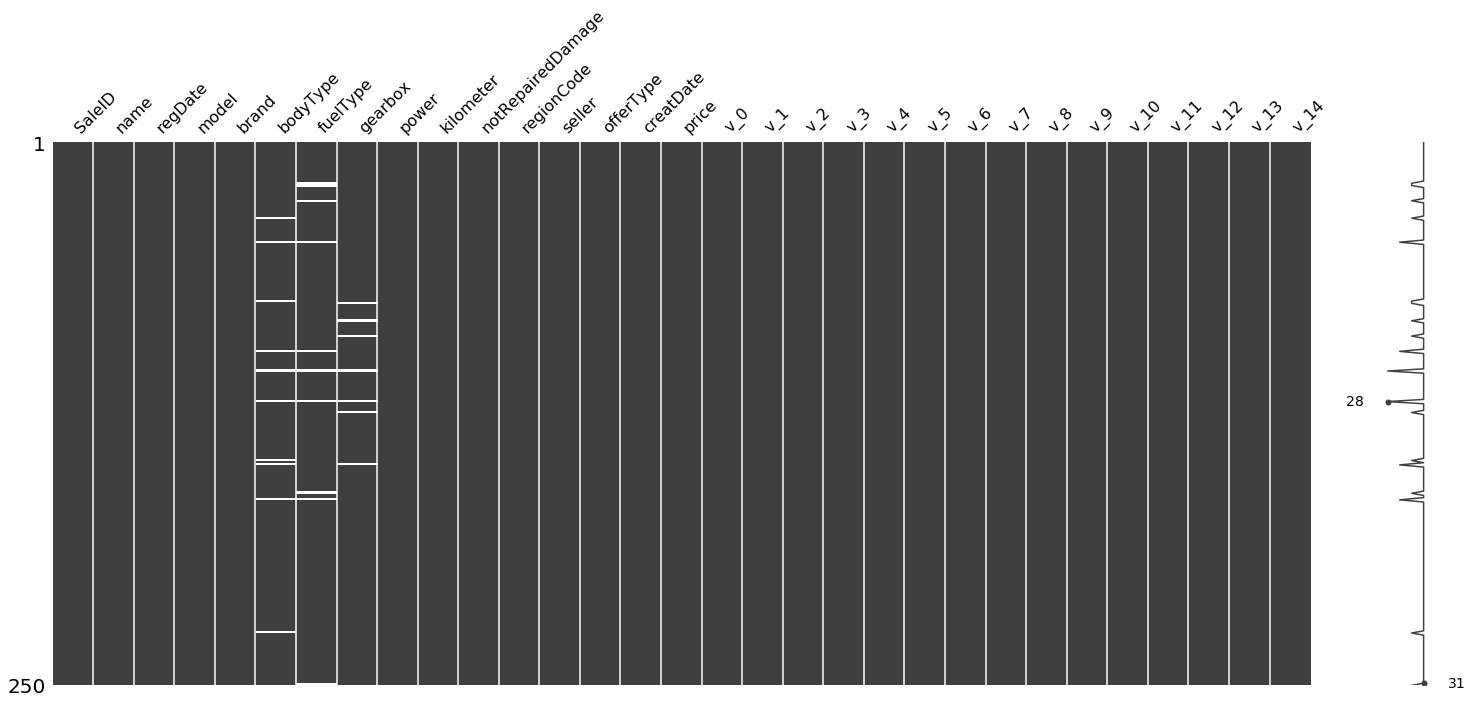

In [16]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))

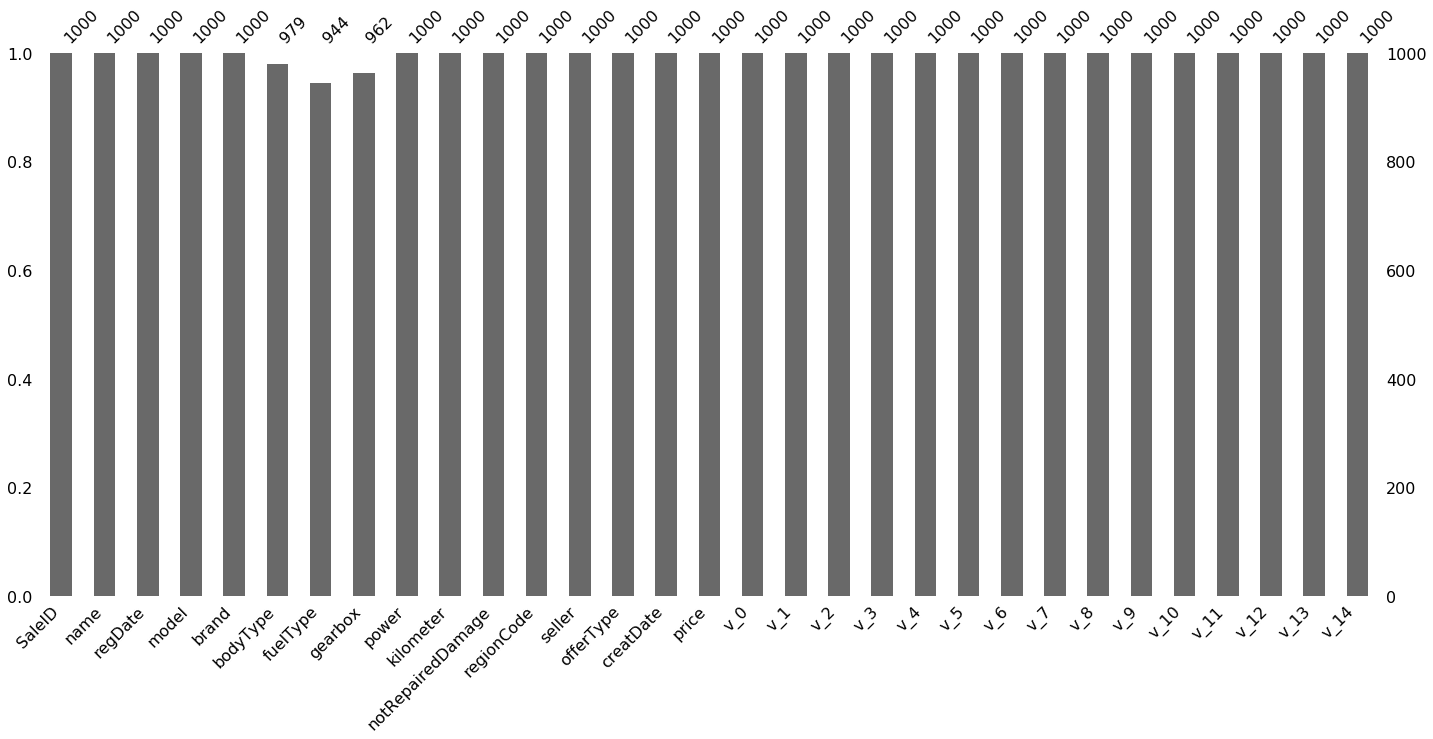

In [17]:
msno.bar(Train_data.sample(1000))

In [18]:
## 2) 查看异常值检测
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
SaleID               150000 non-null int64
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4       

In [19]:
Train_data['notRepairedDamage'].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [20]:
Test_data['notRepairedDamage'].value_counts()

0.0    37249
-       8031
1.0     4720
Name: notRepairedDamage, dtype: int64

In [21]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

以下两个类别特征严重倾斜，一般不会对预测有什么帮助，故这边先删掉，当然你也可以继续挖掘，但是一般意义不大



In [22]:
Train_data["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

In [23]:
Train_data["offerType"].value_counts()

0    150000
Name: offerType, dtype: int64

In [24]:
del Train_data["seller"]
del Train_data["offerType"]
del Test_data["seller"]
del Test_data["offerType"]

In [25]:
Train_data['price']

0          1850
1          3600
2          6222
3          2400
4          5200
5          8000
6          3500
7          1000
8          2850
9           650
10         3100
11         5450
12         1600
13         3100
14         6900
15         3200
16        10500
17         3700
18          790
19         1450
20          990
21         2800
22          350
23          599
24         9250
25         3650
26         2800
27         2399
28         4900
29         2999
          ...  
149970      900
149971     3400
149972      999
149973     3500
149974     4500
149975     3990
149976     1200
149977      330
149978     3350
149979     5000
149980     4350
149981     9000
149982     2000
149983    12000
149984     6700
149985     4200
149986     2800
149987     3000
149988     7500
149989     1150
149990      450
149991    24950
149992      950
149993     4399
149994    14780
149995     5900
149996     9500
149997     7500
149998     4999
149999     4700
Name: price, Length: 150

In [26]:
Train_data['price'].value_counts()

500      2337
1500     2158
1200     1922
1000     1850
2500     1821
600      1535
3500     1533
800      1513
2000     1378
999      1356
750      1279
4500     1271
650      1257
1800     1223
2200     1201
850      1198
700      1174
900      1107
1300     1105
950      1104
3000     1098
1100     1079
5500     1079
1600     1074
300      1071
550      1042
350      1005
1250     1003
6500      973
1999      929
         ... 
21560       1
7859        1
3120        1
2279        1
6066        1
6322        1
4275        1
10420       1
43300       1
305         1
1765        1
15970       1
44400       1
8885        1
2992        1
31850       1
15413       1
13495       1
9525        1
7270        1
13879       1
3760        1
24250       1
11360       1
10295       1
25321       1
8886        1
8801        1
37920       1
8188        1
Name: price, Length: 3763, dtype: int64

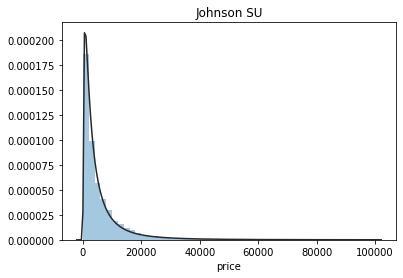

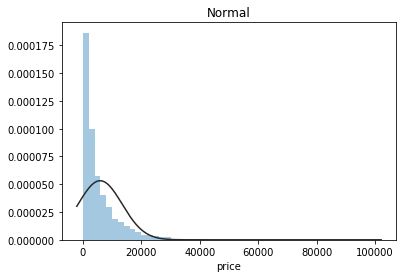

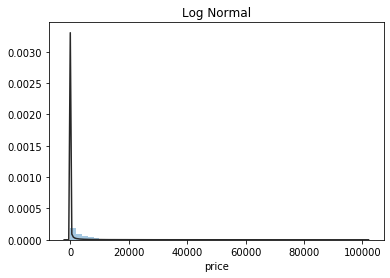

In [27]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 3.346487
Kurtosis: 18.995183


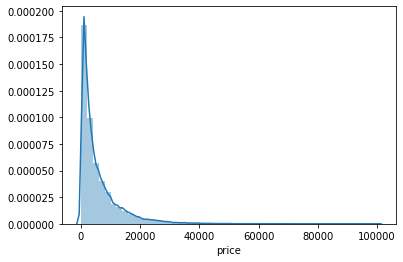

In [28]:
## 2) 查看skewness and kurtosis
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

In [29]:
Train_data.skew(), Train_data.kurt()

(SaleID         0.000000
 name           0.557606
 regDate        0.028495
 model          1.484388
 brand          1.150760
 bodyType       0.991530
 fuelType       1.595486
 gearbox        1.317514
 power         65.863178
 kilometer     -1.525921
 regionCode     0.688881
 creatDate    -79.013310
 price          3.346487
 v_0           -1.316712
 v_1            0.359454
 v_2            4.842556
 v_3            0.106292
 v_4            0.367989
 v_5           -4.737094
 v_6            0.368073
 v_7            5.130233
 v_8            0.204613
 v_9            0.419501
 v_10           0.025220
 v_11           3.029146
 v_12           0.365358
 v_13           0.267915
 v_14          -1.186355
 dtype: float64, SaleID          -1.200000
 name            -1.039945
 regDate         -0.697308
 model            1.740483
 brand            1.076201
 bodyType         0.206937
 fuelType         5.880049
 gearbox         -0.264161
 power         5733.451054
 kilometer        1.141934
 regionCode   

偏度（Skewness）Definition:是描述数据分布形态的统计量，其描述的是某总体取值分布的对称性，简单来说就是数据的不对称程度。
(1）Skewness = 0 ，分布形态与正态分布偏度相同。
（2）Skewness > 0 ，正偏差数值较大，为正偏或右偏。长尾巴拖在右边，数据右端有较多的极端值。
（3）Skewness < 0 ，负偏差数值较大，为负偏或左偏。长尾巴拖在左边，数据左端有较多的极端值。
（4）数值的绝对值越大，表明数据分布越不对称，偏斜程度大。

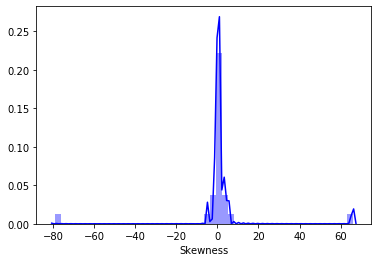

In [30]:
sns.distplot(Train_data.skew(),color='blue',axlabel ='Skewness')

Definition:偏度是描述某变量所有取值分布形态陡缓程度的统计量，简单来说就是数据分布顶的尖锐程度。
（1）Kurtosis=0 与正态分布的陡缓程度相同。
（2）Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰
（3）Kurtosis<0 比正态分布的高峰来得平台——平顶峰


SaleID          -1.200000
name            -1.039945
regDate         -0.697308
model            1.740483
brand            1.076201
bodyType         0.206937
fuelType         5.880049
gearbox         -0.264161
power         5733.451054
kilometer        1.141934
regionCode      -0.340832
creatDate     6881.080328
price           18.995183
v_0              3.993841
v_1             -1.753017
v_2             23.860591
v_3             -0.418006
v_4             -0.197295
v_5             22.934081
v_6             -1.742567
v_7             25.845489
v_8             -0.636225
v_9             -0.321491
v_10            -0.577935
v_11            12.568731
v_12             0.268937
v_13            -0.438274
v_14             2.393526
dtype: float64

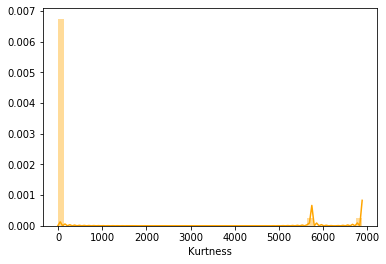

In [34]:
sns.distplot(Train_data.kurt(),color='orange',axlabel ='Kurtness')
Train_data.kurt()

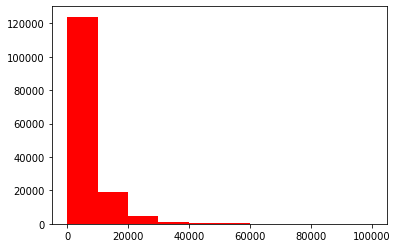

In [35]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation = 'vertical',histtype = 'bar', color ='red')
plt.show()

查看频数, 大于20000得值极少，其实这里也可以把这些当作特殊得值（异常值）直接用填充或者删掉，再前面进行



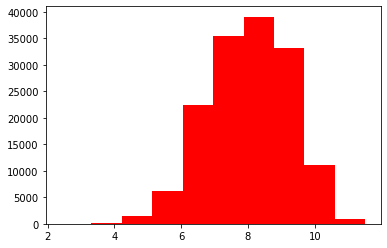

In [36]:
# log变换 z之后的分布较均匀，可以进行log变换进行预测，这也是预测问题常用的trick
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()

# 2.3.6 特征分为类别特征和数字特征，并对类别特征查看unique分布


In [37]:
# 分离label即预测值
Y_train = Train_data['price']

In [38]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

In [39]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

In [40]:
# 特征nunique分布
for cat_fea in categorical_features:
    print(cat_fea + "的特征分布如下：")
    print("{}特征有个{}不同的值".format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
0.0      11762
19.0      9573
4.0       8445

# 2.3.7 数字特征分析


In [41]:
numeric_features.append('price')
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [42]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [43]:
## 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 

